In [171]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('machinehack-ode-to-code-tredence')
jovian.set_colab_id('1k5--hD8q0ln8nYzMNDY-A-IYJaeKsXIN')

# machinehack-ode-to-code-tredence

Use the "Run" button to execute the code.

In [1]:
!pip install jovian --upgrade --quiet

     |████████████████████████████████| 68 kB 2.9 MB/s 


In [2]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="machinehack-ode-to-code-tredence", \
              git_message = "first commit from jovian",
              git_commit= True)
# it can work only when executing the notebook on the binder.

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pknayak0707-job/machinehack-ode-to-code-tredence


'https://jovian.ai/pknayak0707-job/machinehack-ode-to-code-tredence'

# Downloading the data form drive

In [3]:
from google.colab import drive
drive.mount('/content/drive',\
            force_remount=True)

Mounted at /content/drive


In [87]:
data_dir = '/content/drive/MyDrive/Professional/Coding Challenges/MachineHack/TredenceOdeToCode/dataset'

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [89]:
train_org_df = pd.read_csv(data_dir+'/train.csv')
train_org_df.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,5.75,x,n,t,s,w,6.13,14.93,w,f,f,d,a
1,p,2.27,o,g,f,f,f,0.00,0.00,f,f,f,d,s
2,p,5.59,c,y,t,x,p,5.47,11.27,w,f,f,d,a
3,p,0.74,x,p,f,a,n,4.33,0.98,k,f,f,d,a
4,p,9.60,x,n,f,a,w,10.84,28.52,w,f,f,d,u


In [90]:
test_org_df = pd.read_csv(data_dir+'/test.csv')
test_org_df.head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,4.68,x,w,f,x,w,8.22,9.58,n,t,NaN,g,NaN
1,p,10.33,x,y,f,a,y,11.98,13.29,y,t,NaN,d,NaN
2,p,9.26,x,w,t,NaN,w,7.41,12.68,w,t,l,g,NaN
3,p,14.90,s,w,t,d,w,5.33,23.03,w,f,f,d,NaN
4,p,1.01,x,w,f,a,w,3.17,1.64,e,f,f,l,NaN


In [91]:
sample_df = pd.read_csv(data_dir+'/sample_submission.csv')
sample_df.head()

,season
0,a
1,a
2,a
3,a
4,a


# Data Inspection

In [92]:
train_org_df.shape, test_org_df.shape

((42748, 14), (18321, 14))

In [93]:
train_org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42748 entries, 0 to 42747
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      42748 non-null  object 
 1   cap-diameter          42748 non-null  float64
 2   cap-shape             42748 non-null  object 
 3   cap-color             42748 non-null  object 
 4   does-bruise-or-bleed  42748 non-null  object 
 5   gill-attachment       35808 non-null  object 
 6   gill-color            42748 non-null  object 
 7   stem-height           42748 non-null  float64
 8   stem-width            42748 non-null  float64
 9   stem-color            42748 non-null  object 
 10  has-ring              42748 non-null  object 
 11  ring-type             41029 non-null  object 
 12  habitat               42748 non-null  object 
 13  season                42748 non-null  object 
dtypes: float64(3), object(11)
memory usage: 4.6+ MB


## Unique values

In [94]:
def unique_value_for_dataframe(df):
  for cols in df.columns:
    print('----------Unique values in "'+ cols +'" column-------------------')
    print(df[cols].unique())
    print('-----------End of unique values for "' + cols +'" columns ---------------\n' )

In [95]:
unique_value_for_dataframe(train_org_df)

----------Unique values in "edible-poisonous" column-------------------
['p' 'e']
-----------End of unique values for "edible-poisonous" columns ---------------

----------Unique values in "cap-diameter" column-------------------
[ 5.75  2.27  5.59 ... 53.34 50.17 18.77]
-----------End of unique values for "cap-diameter" columns ---------------

----------Unique values in "cap-shape" column-------------------
['x' 'o' 'c' 'f' 'b' 's' 'p']
-----------End of unique values for "cap-shape" columns ---------------

----------Unique values in "cap-color" column-------------------
['n' 'g' 'y' 'p' 'w' 'o' 'l' 'r' 'e' 'b' 'k' 'u']
-----------End of unique values for "cap-color" columns ---------------

----------Unique values in "does-bruise-or-bleed" column-------------------
['t' 'f']
-----------End of unique values for "does-bruise-or-bleed" columns ---------------

----------Unique values in "gill-attachment" column-------------------
['s' 'f' 'x' 'a' 'e' nan 'd' 'p']
-----------End of uni

## Null values Count

In [96]:
train_org_df.isna().sum()

edible-poisonous           0
cap-diameter               0
cap-shape                  0
cap-color                  0
does-bruise-or-bleed       0
gill-attachment         6940
gill-color                 0
stem-height                0
stem-width                 0
stem-color                 0
has-ring                   0
ring-type               1719
habitat                    0
season                     0
dtype: int64

## Data types of the columns:

In [97]:
train_org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42748 entries, 0 to 42747
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      42748 non-null  object 
 1   cap-diameter          42748 non-null  float64
 2   cap-shape             42748 non-null  object 
 3   cap-color             42748 non-null  object 
 4   does-bruise-or-bleed  42748 non-null  object 
 5   gill-attachment       35808 non-null  object 
 6   gill-color            42748 non-null  object 
 7   stem-height           42748 non-null  float64
 8   stem-width            42748 non-null  float64
 9   stem-color            42748 non-null  object 
 10  has-ring              42748 non-null  object 
 11  ring-type             41029 non-null  object 
 12  habitat               42748 non-null  object 
 13  season                42748 non-null  object 
dtypes: float64(3), object(11)
memory usage: 4.6+ MB


## Inferences from the data inspected:

* There are some null values in the columns `gill-attachment` and `ring-type`
* the stem-width is in mm and all otehr numerical dimensions are in cm. So convert the same into similar units. 

# Data Cleaning and Preparation

### gill-attachment

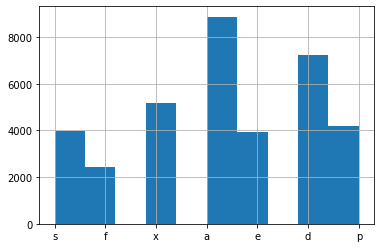

In [98]:
train_org_df['gill-attachment'].hist()

In [99]:
train_org_df.groupby('gill-attachment')['gill-attachment'].count().sort_values()

gill-attachment
f    2433
e    3939
s    3964
p    4205
x    5171
d    7222
a    8874
Name: gill-attachment, dtype: int64

In [100]:
train_org_df['gill-attachment'] = train_org_df['gill-attachment'].replace(np.nan, 'a' )
train_org_df.groupby('gill-attachment')['gill-attachment'].count()

gill-attachment
a    15814
d     7222
e     3939
f     2433
p     4205
s     3964
x     5171
Name: gill-attachment, dtype: int64

In [101]:
train_org_df['gill-attachment'].isna().sum()

0

### ring-type column

In [102]:
train_org_df.groupby('ring-type')['ring-type'].count().sort_values()

ring-type
m      243
g      853
p      877
r      992
l     1004
z     1493
e     1703
f    33864
Name: ring-type, dtype: int64

In [103]:
train_org_df['ring-type'] = train_org_df['ring-type'].replace(np.nan, 'f' )

In [104]:
train_org_df.groupby('ring-type')['ring-type'].count().sort_values()

ring-type
m      243
g      853
p      877
r      992
l     1004
z     1493
e     1703
f    35583
Name: ring-type, dtype: int64

In [105]:
train_org_df['ring-type'].isna().sum()

0

In [106]:
train_org_df.isna().sum()

edible-poisonous        0
cap-diameter            0
cap-shape               0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

### Convert the numbers in column `stem-width` mm to cm

In [107]:
train_org_df['stem-width'] = train_org_df['stem-width']/10

### Selecting necessary columns into input and target columns

In [108]:
train_org_df.columns

Index(['edible-poisonous', 'cap-diameter', 'cap-shape', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-height',
       'stem-width', 'stem-color', 'has-ring', 'ring-type', 'habitat',
       'season'],
      dtype='object')

In [109]:
excluded_cols = ['season']

In [110]:
input_cols = [ col for col in train_org_df.columns if col not in excluded_cols]
target_col = 'season'
input_cols, target_col

(['edible-poisonous',
  'cap-diameter',
  'cap-shape',
  'cap-color',
  'does-bruise-or-bleed',
  'gill-attachment',
  'gill-color',
  'stem-height',
  'stem-width',
  'stem-color',
  'has-ring',
  'ring-type',
  'habitat'],
 'season')

In [111]:
train_org_df[input_cols].head()

,edible-poisonous,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat
0,p,5.75,x,n,t,s,w,6.13,1.493,w,f,f,d
1,p,2.27,o,g,f,f,f,0.00,0.000,f,f,f,d
2,p,5.59,c,y,t,x,p,5.47,1.127,w,f,f,d
3,p,0.74,x,p,f,a,n,4.33,0.098,k,f,f,d
4,p,9.60,x,n,f,a,w,10.84,2.852,w,f,f,d


In [112]:
train_org_df[input_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42748 entries, 0 to 42747
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   edible-poisonous      42748 non-null  object 
 1   cap-diameter          42748 non-null  float64
 2   cap-shape             42748 non-null  object 
 3   cap-color             42748 non-null  object 
 4   does-bruise-or-bleed  42748 non-null  object 
 5   gill-attachment       42748 non-null  object 
 6   gill-color            42748 non-null  object 
 7   stem-height           42748 non-null  float64
 8   stem-width            42748 non-null  float64
 9   stem-color            42748 non-null  object 
 10  has-ring              42748 non-null  object 
 11  ring-type             42748 non-null  object 
 12  habitat               42748 non-null  object 
dtypes: float64(3), object(10)
memory usage: 4.2+ MB


In [113]:
numeric_cols = train_org_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_org_df[input_cols].select_dtypes('object').columns.tolist()
numeric_cols, categorical_cols

(['cap-diameter', 'stem-height', 'stem-width'],
 ['edible-poisonous',
  'cap-shape',
  'cap-color',
  'does-bruise-or-bleed',
  'gill-attachment',
  'gill-color',
  'stem-color',
  'has-ring',
  'ring-type',
  'habitat'])

In [114]:
'numeric_cols: '+str(len(numeric_cols)), "categorical_cols: " + str(len(categorical_cols))

('numeric_cols: 3', 'categorical_cols: 10')

### Scaling Numeric Features

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
scaler = MinMaxScaler()
scaler.fit(train_org_df[numeric_cols])
train_org_df[numeric_cols].describe().loc[['min','max'],:]

,cap-diameter,stem-height,stem-width
min,0.38,0.00,0.000
max,62.34,33.92,10.391


In [117]:
train_org_df[numeric_cols] = scaler.transform(train_org_df[numeric_cols])
train_org_df[numeric_cols].describe().loc[['min','max'],:]

,cap-diameter,stem-height,stem-width
min,0.0,0.0,0.0
max,1.0,1.0,1.0


### Encoding Categorical Data

In [118]:
train_org_df[categorical_cols].nunique()

edible-poisonous         2
cap-shape                7
cap-color               12
does-bruise-or-bleed     2
gill-attachment          7
gill-color              12
stem-color              13
has-ring                 2
ring-type                8
habitat                  8
dtype: int64

In [119]:
from sklearn.preprocessing import OneHotEncoder

In [120]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(train_org_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [121]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols,len(encoded_cols))

['edible-poisonous_e', 'edible-poisonous_p', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p', 'cap-shape_s', 'cap-shape_x', 'cap-color_b', 'cap-color_e', 'cap-color_g', 'cap-color_k', 'cap-color_l', 'cap-color_n', 'cap-color_o', 'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w', 'cap-color_y', 'does-bruise-or-bleed_f', 'does-bruise-or-bleed_t', 'gill-attachment_a', 'gill-attachment_d', 'gill-attachment_e', 'gill-attachment_f', 'gill-attachment_p', 'gill-attachment_s', 'gill-attachment_x', 'gill-color_b', 'gill-color_e', 'gill-color_f', 'gill-color_g', 'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y', 'stem-color_b', 'stem-color_e', 'stem-color_f', 'stem-color_g', 'stem-color_k', 'stem-color_l', 'stem-color_n', 'stem-color_o', 'stem-color_p', 'stem-color_r', 'stem-color_u', 'stem-color_w', 'stem-color_y', 'has-ring_f', 'has-ring_t', 'ring-type_e', 'ring-type_f', 'ring-type_g'

In [122]:
train_org_df[encoded_cols] = encoder.transform(train_org_df[categorical_cols])

In [123]:
train_org_df.shape

(42748, 87)

# Splting the Dataset

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
train_df, val_df = train_test_split(train_org_df, test_size=0.25, random_state=42)

In [126]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)

train_df.shape : (32061, 87)
val_df.shape : (10687, 87)


# Training the Model

In [127]:
len(numeric_cols + encoded_cols),target_col

(76, 'season')

In [128]:
train_inputs = train_df[numeric_cols + encoded_cols].copy()
train_targets = train_df[target_col].copy()

In [129]:
diff_cols = [cols for cols in train_df.columns if cols not in train_inputs]
len(diff_cols) # original categorical columsna are removed from the columsn ist

11

In [130]:
train_inputs.shape, train_targets.shape

((32061, 76), (32061,))

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [132]:
#model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
#model = LogisticRegression(multi_class='multinomial', solver='lbfgs',penalty="l2",C=0.1)

model = RandomForestClassifier(n_jobs=-1, random_state=42 )

#model = XGBClassifier(n_jobs=-1, random_state=42)

In [133]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [134]:
X, y = train_inputs, train_targets

In [135]:
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [136]:
from numpy import mean, std

In [137]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.516 (0.009)


In [138]:
# #jovian.log_metrics(C="0.01",acc = "0.507")
# #jovian.log_metrics(C="0.0001",acc = "0.4909")
# #jovian.log_metrics(C="0.1",acc = "0.505")

# jovian.log_metrics(model="RandomforestClassifier",acc = "0.516")

# jovian.log_metrics(model="XGBoostClassifier",acc = "0.516")


# Making Prediction and Evaluating the model

In [139]:
X_train = train_inputs[numeric_cols + encoded_cols]

In [140]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',y=y)

In [141]:
%time
model.fit(X_train, y,sample_weight=classes_weights)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 21.9 µs


RandomForestClassifier(n_jobs=-1, random_state=42)

In [142]:
train_preds = model.predict(X_train)

In [143]:
from sklearn.metrics import f1_score

In [144]:
score_train = 100 * f1_score(train_targets, train_preds, average='macro')
score_train

99.40682705699024

In [145]:
X_val = val_df[numeric_cols + encoded_cols].copy()

In [146]:
val_preds = model.predict(X_val)

In [147]:
val_targets = val_df[target_col].copy()

In [148]:
X_val.shape,  val_preds.shape, val_targets.shape

((10687, 76), (10687,), (10687,))

In [149]:
score_val = 100 * f1_score(val_targets, val_preds, average='macro')
score_val

45.45675351983568

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
Committed successfully! https://jovian.ai/pknayak0707-job/machinehack-ode-to-code-tredence


'https://jovian.ai/pknayak0707-job/machinehack-ode-to-code-tredence'

# Predicting the values for the Test values

In [150]:
excluded_cols,input_cols, target_col

(['season'],
 ['edible-poisonous',
  'cap-diameter',
  'cap-shape',
  'cap-color',
  'does-bruise-or-bleed',
  'gill-attachment',
  'gill-color',
  'stem-height',
  'stem-width',
  'stem-color',
  'has-ring',
  'ring-type',
  'habitat'],
 'season')

## Scaling the Data

In [151]:
test_org_df [numeric_cols] = scaler.transform(test_org_df [numeric_cols])

In [152]:
test_org_df[numeric_cols].describe()

,cap-diameter,stem-height,stem-width
count,18321.000000,18321.000000,18321.000000
mean,0.103370,0.194106,1.172693
std,0.087225,0.099467,0.960670
min,0.000968,0.000000,0.000000
25%,0.050194,0.136498,0.505245
50%,0.089251,0.175708,0.991242
75%,0.132021,0.228774,1.603311
max,0.931730,0.944281,9.431239


## Encoding Categorical Data

In [153]:
test_org_df.isna().sum()

edible-poisonous            0
cap-diameter                0
cap-shape                   0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          2944
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                 752
habitat                     0
season                  18321
dtype: int64

In [154]:
test_null_value_cols = [ col for col in test_org_df.isna().sum().index if test_org_df.isna().sum()[col] > 0]
test_null_value_cols

['gill-attachment', 'ring-type', 'season']

In [155]:
unique_value_for_dataframe(test_org_df)

----------Unique values in "edible-poisonous" column-------------------
['e' 'p']
-----------End of unique values for "edible-poisonous" columns ---------------

----------Unique values in "cap-diameter" column-------------------
[0.06939961 0.16058748 0.14331827 ... 0.90929632 0.35393802 0.31891543]
-----------End of unique values for "cap-diameter" columns ---------------

----------Unique values in "cap-shape" column-------------------
['x' 's' 'p' 'f' 'o' 'b' 'c']
-----------End of unique values for "cap-shape" columns ---------------

----------Unique values in "cap-color" column-------------------
['w' 'y' 'n' 'g' 'b' 'r' 'e' 'p' 'o' 'u' 'k' 'l']
-----------End of unique values for "cap-color" columns ---------------

----------Unique values in "does-bruise-or-bleed" column-------------------
['f' 't']
-----------End of unique values for "does-bruise-or-bleed" columns ---------------

----------Unique values in "gill-attachment" column-------------------
['x' 'a' nan 'd' 'e' 'p' 

In [156]:
test_org_df['gill-attachment'] = test_org_df['gill-attachment'].replace(np.nan, 'a' )
test_org_df['ring-type'] = test_org_df['ring-type'].replace(np.nan, 'f' )

In [157]:
test_org_df.isna().sum()

edible-poisonous            0
cap-diameter                0
cap-shape                   0
cap-color                   0
does-bruise-or-bleed        0
gill-attachment             0
gill-color                  0
stem-height                 0
stem-width                  0
stem-color                  0
has-ring                    0
ring-type                   0
habitat                     0
season                  18321
dtype: int64

In [158]:
test_org_df[encoded_cols] = encoder.transform(test_org_df[categorical_cols])

In [159]:
test_org_df.shape

(18321, 87)

In [160]:
cols_list = [ col for col in train_org_df.columns if col not in test_org_df.columns ]
cols_list

[]

In [161]:
X_test = test_org_df[numeric_cols + encoded_cols].copy()

In [162]:
test_preds = model.predict(X_test)

In [163]:
X_test.shape,  test_preds.shape

((18321, 76), (18321,))

# Creating the Submission files


In [164]:
sub_df = pd.DataFrame()

In [165]:
sample_df.head()

,season
0,a
1,a
2,a
3,a
4,a


In [166]:
#sub_df['instance_id'] = test_org_df['instance_id']

In [167]:
sub_df['season'] = test_preds

In [168]:
sub_df['season'].unique()

array(['u', 'w', 'a', 's'], dtype=object)

In [169]:
sub_df.to_csv('rd_model_colsbyten.csv', index= False)

In [172]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/pknayak0707-job/machinehack-ode-to-code-tredence


'https://jovian.ai/pknayak0707-job/machinehack-ode-to-code-tredence'